In [7]:
import numpy as np
from photutils import datasets
hbu = datasets.load_star_image()
from photutils import DAOStarFinder
from astropy.stats import mad_std
from photutils import aperture_photometry, CircularAperture
%matplotlib inline
import matplotlib.pyplot as plt
# Uploads an image from a bundled dataset

In [8]:
image = hbu.data[500:700, 500:700].astype(float)
# Selecting a subset of the image
image -= np.median(image)
# Subtracts out a rough estimate of the background intensity

In [9]:
bkg_sigma = mad_std(image)
# This will define the background intensity level
# Assumes a background-subtracted image
daofind = DAOStarFinder(fwhm = 4., threshold = 3. * bkg_sigma)
# Will find stars will parameters greater than the arguments
# Sets a 3-sigma noise level for star detection
sources = daofind(image)
print(sources)
# Parameters of the detected sources returned in a table

 id   xcentroid     ycentroid    ...  peak       flux           mag      
--- ------------- -------------- ... ------ ------------- ---------------
  1 182.838658938 0.167670190537 ... 3824.0 2.80283459469  -1.11899367311
  2 189.204308134 0.260813525338 ... 4913.0 3.87291850311  -1.47009589582
  3 5.79464911433  2.61254240807 ... 7752.0  4.1029107294  -1.53273016937
  4 36.8470627804  1.32202279582 ... 8739.0 7.43158178793  -2.17770315441
  5  3.2565602452  5.41895201748 ... 6935.0 3.81262984074  -1.45306160673
  6 10.2680378117  5.39992037627 ... 8205.0 2.84725166946  -1.13606464067
  7 93.5564238612  7.38602419245 ... 7440.0 7.03561705333  -2.11825548225
  8 5.73805567511  7.51522391382 ... 8500.0 2.72018182959  -1.08649483816
  9 19.1364892873  9.04066195256 ... 3691.0  2.7049517699  -1.08039881478
 10 55.0520018054  11.3531158647 ... 8115.0 2.91399108796  -1.16122054802
...           ...            ... ...    ...           ...             ...
142 141.911446413  181.036982998 ... 8

In [10]:
positions = (sources['xcentroid'], sources['ycentroid']) 
# Defines the locations of the stars from the source list
apertures = CircularAperture(positions, r = 4.)
# Uses circular apertures with a radius of 4 pixels
# Calculates the sum of the pixel values within the apertures
phot_table = aperture_photometry(image, apertures)
print(phot_table)

 id    xcenter       ycenter      aperture_sum
         pix           pix                    
--- ------------- -------------- -------------
  1 182.838658938 0.167670190537 18121.7594837
  2 189.204308134 0.260813525338 29836.5152158
  3 5.79464911433  2.61254240807 331979.819037
  4 36.8470627804  1.32202279582 183705.093284
  5  3.2565602452  5.41895201748 349468.978627
  6 10.2680378117  5.39992037627 261533.368196
  7 93.5564238612  7.38602419245 66815.0304252
  8 5.73805567511  7.51522391382 363004.571475
  9 19.1364892873  9.04066195256 49273.9292606
 10 55.0520018054  11.3531158647  380132.87853
...           ...            ...           ...
143  171.90254459  183.061032811 47904.4193471
144 77.2481986349  184.027346405 54903.4170297
145 14.5104744617  185.863679944 143839.371649
146 153.556211683  185.964827386 142561.834133
147 197.248635428   186.16646576 137269.807113
148 124.313272579  188.305229159 45084.8737867
149 24.2572074962  194.714942814 355778.007298
150 116.44999

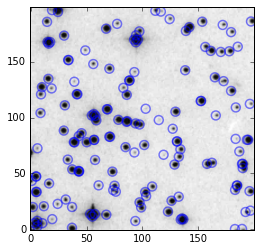

In [11]:
plt.imshow(image, cmap = 'gray_r', origin = 'lower')
apertures.plot(color = 'blue', lw = 1.5, alpha = 0.5)